## 通し課題➀ クラス分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. データの読み込みとデータ表示

In [2]:
original = pd.read_csv('input/ks-projects-201801.csv')
df = original.copy()

In [3]:
display(df.head(5))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
display(df.describe())
print(df.info())
print(df.isnull().sum())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   

In [5]:
# state列が取る値を確認
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [6]:
# state列のsuccessfulをTrue、それ以外をFalseに割り振る
df['state'] = (df['state'] == 'successful')

In [7]:
deadlineとlaunchedから新しい特徴量durationを作成
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['duration'] = (df['deadline'] - df['launched']).dt.days
df.head(8)

NameError: name 'deadlineとlaunchedから新しい特徴量durationを作成' is not defined

### 2. データの可視化と前処理

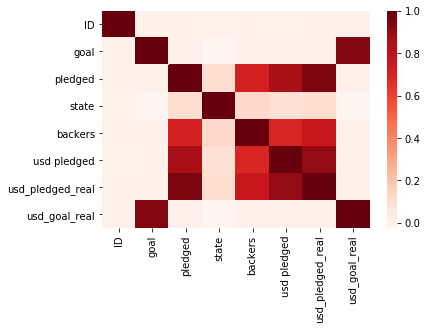

In [8]:
sns.heatmap(df.corr(), cmap="Reds")
plt.show()

In [9]:
# データを成功、失敗で分ける
df_successful = df[df['state'] == True]
df_failed = df[df['state'] == False]

#### goalとusd_goal_realの比較

In [10]:
# plt.plot(np.log(df_successful['goal']), np.log(df_successful['usd_goal_real']), '.', color='blue', label='successful')
# plt.plot(np.log(df_failed['goal']), np.log(df_failed['usd_goal_real']), 'x', color='red', label='failed')
# plt.xlabel('goal')
# plt.ylabel('usd_goal_real')
# plt.legend()
# plt.show()

#### pledgedとusd_pledged_realの比較

In [11]:
# plt.plot(np.log(df_successful['pledged']), np.log(df_successful['usd_pledged_real']), '.', color='blue', label='successful')
# plt.plot(np.log(df_failed['pledged']), np.log(df_failed['usd_pledged_real']), 'x', color='red', label='failed')
# plt.xlabel('pledged')
# plt.ylabel('usd_pledged_real')
# plt.legend()
# plt.show()

#### pledgedとusd pledgedの比較

In [12]:
# plt.plot(np.log(df_successful['pledged']), np.log(df_successful['usd pledged']), '.', color='blue', label='successful')
# plt.plot(np.log(df_failed['pledged']), np.log(df_failed['usd pledged']), 'x', color='red', label='failed')
# plt.xlabel('pledged')
# plt.ylabel('usd_pledged_real')
# plt.legend()
# plt.show()

goalとusd_goal_realは相関が強いので片方だけで目的変数を説明できそう。  
同様に、pledgedとusd pledged、usd_pledged_realも一つだけ採用すればよさそう。

#### 不要な列の削除

In [13]:
drop_columns_list = ['ID', 'name', 'goal', 'pledged', 'usd pledged', 'category', 'deadline', 'launched']
df.drop(drop_columns_list, axis=1, inplace=True)
df.head()

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real
0,Publishing,GBP,False,0,GB,0.0,1533.95
1,Film & Video,USD,False,15,US,2421.0,30000.00
2,Film & Video,USD,False,3,US,220.0,45000.00
3,Music,USD,False,1,US,1.0,5000.00
4,Film & Video,USD,False,14,US,1283.0,19500.00


#### カテゴリ変数を数値に変換する

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_feature = ['main_category', 'currency', 'country']
df[categorical_feature] = df[categorical_feature].apply(encoder.fit_transform)
df.head(8)

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real
0,12,5,False,0,9,0.0,1533.95
1,6,13,False,15,22,2421.0,30000.00
2,6,13,False,3,22,220.0,45000.00
3,10,13,False,1,22,1.0,5000.00
4,6,13,False,14,22,1283.0,19500.00
5,7,13,True,224,22,52375.0,50000.00
6,7,13,True,16,22,1205.0,1000.00
7,7,13,False,40,22,453.0,25000.00


### 4. モデル作成と学習

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [16]:
y = df['state'].values
X = df.drop('state', axis=1).values

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=2020, tol=1e-3)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=2020, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

### 5. モデルの評価

In [17]:
for i, weight in enumerate(clf.coef_[0]):
    print("weight{}: {:.3f}".format(i + 1, weight))

weight1: -1234.595
weight2: -386.965
weight3: 3310.154
weight4: -47.335
weight5: 211.294
weight6: -221.961


In [18]:
# ラベルを予測
y_pred = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(-log_loss(y, y_pred)))

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# Precision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

対数尤度 = -0.538
正答率（Accuracy） = 98.442%
適合率（Precision） = 97.589%
再現率（Recall） = 98.018%
F1値（F1-score） = 97.803%


In [19]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['正解', '正解'], columns=['予測', '予測'])
conf_mat

,予測,予測
正解,241461,3244
正解,2655,131301
